# Data Science & Business Analytics Tasks

### Intern: Gayathri Devi Nagalapuram



## Task -2 Prediction using Unsupervised ML

### K-Means Clustering
 
    
From the given ‘Iris’ dataset, we will predict the optimum number of clusters and represent it visually. 

### Importing Needed packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

### Load the iris dataset

In [4]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Data Exploration

In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# shape
print(iris_df.shape)

(150, 4)


In [7]:
# class distribution
print(iris_df.groupby('sepal length (cm)').size())

sepal length (cm)
4.3     1
4.4     3
4.5     1
4.6     4
4.7     2
4.8     5
4.9     6
5.0    10
5.1     9
5.2     4
5.3     1
5.4     6
5.5     7
5.6     6
5.7     8
5.8     7
5.9     3
6.0     6
6.1     6
6.2     4
6.3     9
6.4     7
6.5     5
6.6     2
6.7     8
6.8     3
6.9     4
7.0     1
7.1     1
7.2     3
7.3     1
7.4     1
7.6     1
7.7     4
7.9     1
dtype: int64


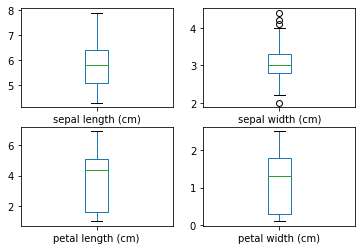

In [8]:
# box and whisker plots
iris_df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

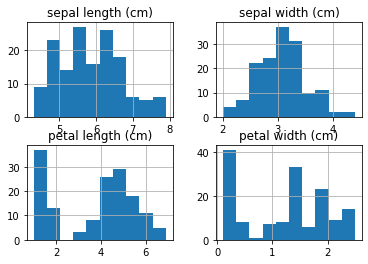

In [9]:
# histograms
iris_df.hist()
plt.show()

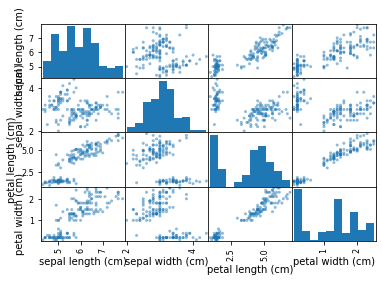

In [10]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df)
plt.show()

### Finding the optimum number of clusters for K Means Classification

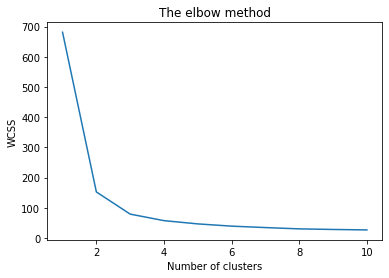

In [11]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From the above graph,**The Elbow method**, the optimum clusters is where the elbow occurs.
From this we choose the number of clusters as **'3**'.

### Applying kmeans to the dataset / Creating the kmeans classifier

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising the clusters - On the first two columns

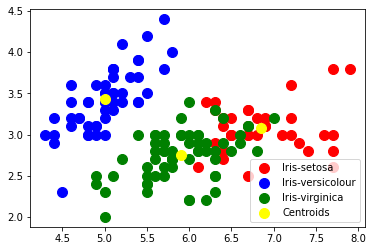

In [13]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()